In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

In [2]:
#load iris dataset
iris_dataset=load_iris()

In [3]:
#random_state：乱数を用いてデータセットをシャッフルする
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [4]:
#numpy配列をpandasのDataFrameに変換する
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


In [6]:
iris_df.shape

(112, 4)

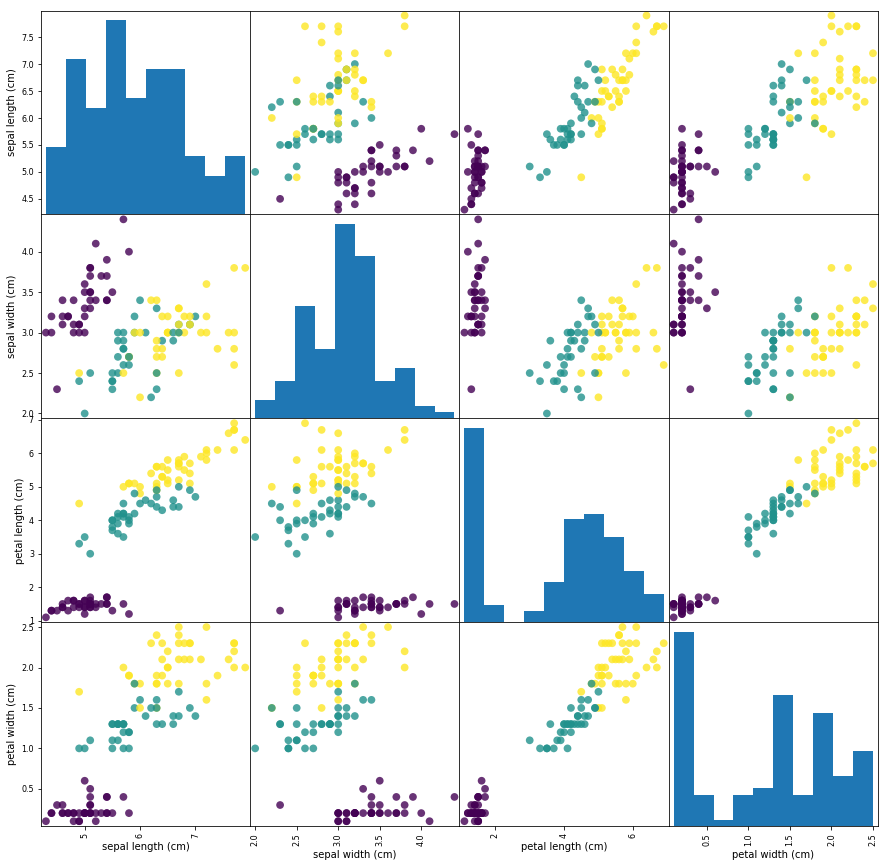

In [7]:
grr = pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15), marker='0', s=60, alpha=0.8)

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
X_new = np.array([[5,2.9,1,0.2]])

In [11]:
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


In [12]:
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [13]:
np.mean(y_pred==y_test)

0.97368421052631582

In [14]:
#精度
knn.score(X_test,y_test)

0.97368421052631582

In [15]:
#k-最近傍法によるクラス分類_KNeighborsClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


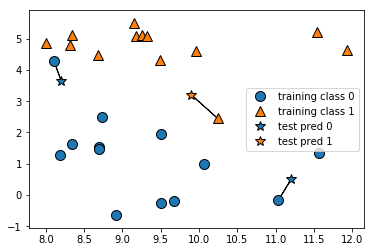

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


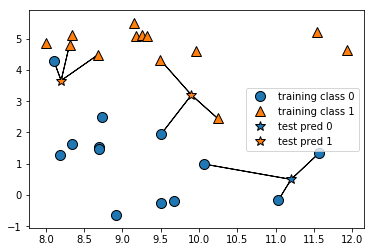

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [18]:
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [19]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
#testdataに対す予測
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [20]:
#testdataに対する精度
clf.score(X_test,y_test)

0.8571428571428571

In [21]:
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


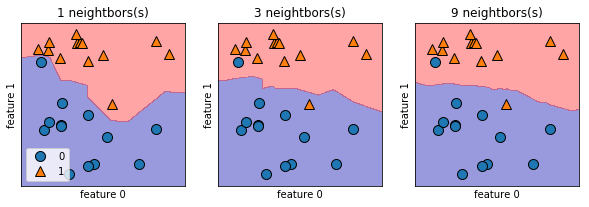

In [22]:
#異なる最近傍点に対する決定境界

#绘制子图matplot下用subplot绘制多个子图
#参考链接：https://blog.csdn.net/gatieme/article/details/61416645

#matplotlib下, 一个 Figure 对象可以包含多个子图(Axes), 可以使用 subplot() 快速绘制 :subplot(numRows, numCols, plotNum)
#图表的整个绘图区域被分成 numRows 行和 numCols 列
#然后按照从左到右，从上到下的顺序对每个子区域进行编号，左上的子区域的编号为1
#plotNum 参数指定创建的 Axes 对象所在的区域
fig, axes = plt.subplots(1,3,figsize=(10,3)) #返回的fig为figure画板对象，axes为绘制的3个子图

X, y = mglearn.datasets.make_forge()

#分别对3个子图，定义K=1，3，9进行绘制
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    #用mglearn中自带的函数，画分类的决策边界（decision boundary）
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    #mglearn.discrete_scatter() は matplotlib.pyplot.scatter() に対するユーティリティ
    mglearn.discrete_scatter(X[:,0] , X[:,1], y, ax=ax)
    ax.set_title("{} neightbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
#legend() -> 凡例
axes[0].legend(loc=3)

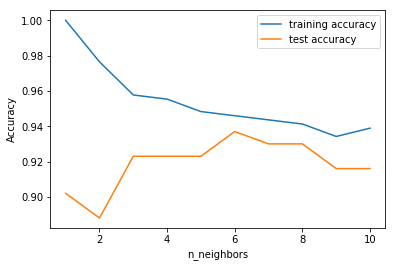

In [23]:
#最近傍点数に対する訓練精度とテスト精度の比較

cancer = sklearn.datasets.load_breast_cancer()
#データセットを訓練セットとテストセットに分割する
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #モデムを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #訓練セット精度を記録
    training_accuracy.append(clf.score(X_train,y_train))
    #汎化精度を記録
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label ="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [24]:
#k-近傍回帰_KNeighborsRegressor

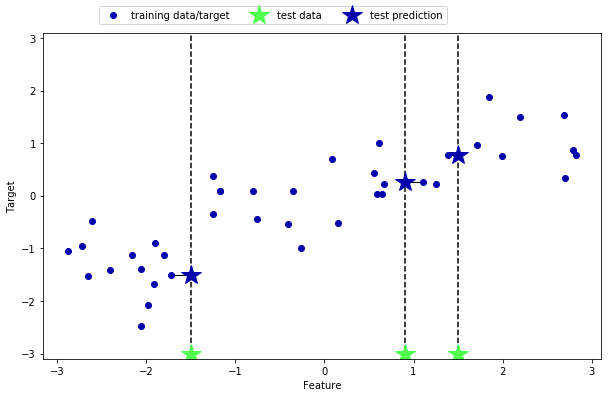

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

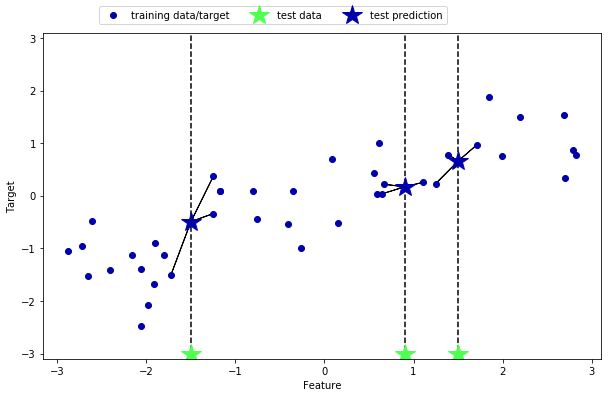

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [27]:
X,y = mglearn.datasets.make_wave(n_samples=40)

In [28]:
#データセットを訓練セットとテストセットに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [30]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [31]:
reg.score(X_test,y_test)

0.83441724462496036

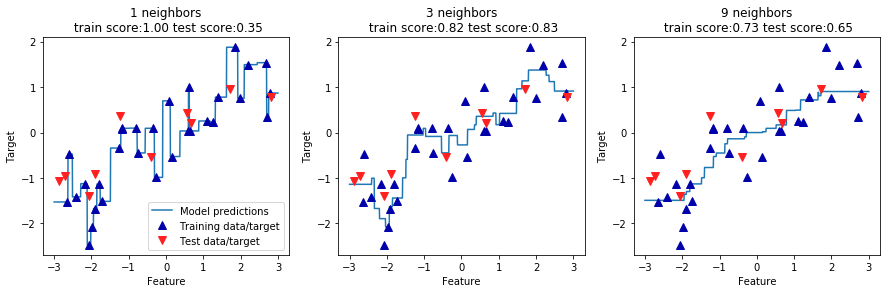

In [32]:
fig,axes = plt.subplots(1,3,figsize=(15,4))

#-3から3までの間に１０００点のデータポイントを作る
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0),  markersize=8)
    ax.plot(X_test, y_test, "v",  c=mglearn.cm2(1),  markersize=8)
    
    ax.set_title("{} neighbors\n train score:{:.2f} test score:{:.2f}".
                 format(n_neighbors, reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target","Test data/target"],loc="best")